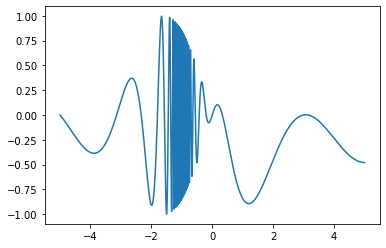

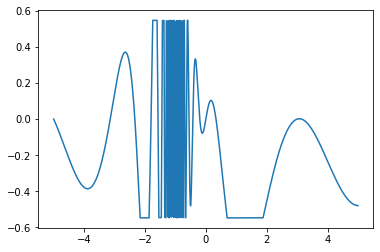

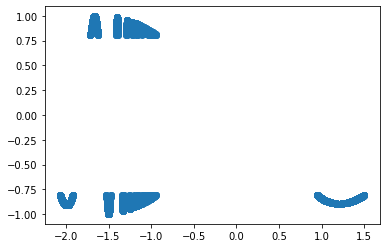

100000
HR: [(b'HR_0',  2.93585886e-16) (b'HR_1', -3.76589234e-05)
 (b'HR_2', -7.53219567e-05) ... (b'HR_99997', -4.79461176e-01)
 (b'HR_99998', -4.79461503e-01) (b'HR_99999', -4.79461823e-01)]
78719
MID: [(b'MID_0',  2.93585886e-16) (b'MID_1', -3.76589234e-05)
 (b'MID_2', -7.53219567e-05) ... (b'MID_78716', -4.79461176e-01)
 (b'MID_78717', -4.79461503e-01) (b'MID_78718', -4.79461823e-01)]
10020
PEAK: [(b'PEAK_0', -0.80624635) (b'PEAK_1', -0.8064815 )
 (b'PEAK_2', -0.80671645) ... (b'PEAK_10017', -0.80635087)
 (b'PEAK_10018', -0.8062975 ) (b'PEAK_10019', -0.80624411)]


In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import struct

x  = []
y  = []
x2 = []
y2 = []
x3 = []
y3 = []
for i in np.arange(-5,5,0.0001):
    n = (np.cos((2 * np.pi * i**2)/(i**2 + i))) * np.sin(i)
    
    x.append(i)
    y.append(n)
    
    if n**2 < 0.3:
        x2.append(i)
        y2.append(n)
    if n**2 > 0.65:
        x3.append(i)
        y3.append(n)
                   
dtype    = np.dtype([('string', 'S10'), ('float', np.float64)])

HRdata   = np.array([(f"HR_{index}".encode('ascii'), value) for index, value in enumerate(y)], dtype=dtype)
MIDdata  = np.array([(f"MID_{index}".encode('ascii'), value) for index, value in enumerate(y2)], dtype=dtype)
PEAKdata = np.array([(f"PEAK_{index}".encode('ascii'), value) for index, value in enumerate(y3)], dtype=dtype)

with open('wave_data.bin', 'wb') as f:
    f.write(struct.pack('I', len(HRdata)))
    f.write(struct.pack('I', len(MIDdata)))
    f.write(struct.pack('I', len(PEAKdata)))
    HRdata.tofile(f)
    MIDdata.tofile(f)
    PEAKdata.tofile(f)

#all_data = np.concatenate([HRdata, MIDdata, PEAKdata])

#all_data.tofile('wave_data.bin')

#loaded_data = np.fromfile('data.bin', dtype=dtype)
    
plt.plot(x, y)
plt.show()

plt.plot(x2,y2)
plt.show()

plt.scatter(x3,y3)
plt.show()

print(len(HRdata))
print(f"HR: {HRdata}")
print(len(MIDdata))
print(f"MID: {MIDdata}")
print(len(PEAKdata))
print(f"PEAK: {PEAKdata}")